<a href="https://colab.research.google.com/github/marcoshsq/Stocks_Market_Data_Analysis/blob/main/Extracting_Stock_Data_Using_a_Python_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting Stock Data Using a Python Library

In [1]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3

     |████████████████████████████████| 6.4 MB 12.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data
Using the Ticker module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is AAPL.

In [3]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.

### Stock Info
Using the attribute info we can extract information about the stock as a Python dictionary.

In [4]:
apple_info=apple.info
apple_info

{'52WeekChange': 0.46455383,
 'SandP52WeekChange': 0.14711452,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 0,
 'askSize': 800,
 'averageDailyVolume10Day': 93050320,
 'averageVolume': 94158368,
 'averageVolume10days': 93050320,
 'beta': 1.185531,
 'beta3Year': None,
 'bid': 0,
 'bidSize': 2900,
 'bookValue': 4.402,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 175.6,
 'currentRatio': 1.038,
 'dateShortInterest': 1647302400,
 'dayHigh': 175.73,
 'dayLow': 172,
 'debtToEquity': 170.714,
 'dividendRate': 0.88,
 'dividendYield': 0.0050999997,
 'earningsGrowth': 0.25,
 'earningsQuarterlyGrowth': 0.204,
 'ebitda': 128217997312,
 'ebitdaMargins': 0.33890998,
 'enterpriseToEbitda': 22.697,
 'enterpriseToRevenue': 7.692,
 'enterpriseValue': 2910217830400,
 'exDividendDate': 1643932800,
 'exchange': 

We can get the 'country' using the key country



In [6]:
apple_info['country']

'United States'

### Extracting Share Price

A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the history() method we can get the share price of the stock over a certain period of time. Using the period parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [7]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the Date as the index the share Open, High, Low, Close, Volume, and Stock Splits are given for each day.

In [8]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100323,0.100759,0.100323,0.100323,469033600,0.0,0.0
1980-12-15,0.095525,0.095525,0.095089,0.095089,175884800,0.0,0.0
1980-12-16,0.088546,0.088546,0.088110,0.088110,105728000,0.0,0.0
1980-12-17,0.090291,0.090727,0.090291,0.090291,86441600,0.0,0.0
1980-12-18,0.092908,0.093345,0.092908,0.092908,73449600,0.0,0.0


We can reset the index of the DataFrame with the reset_index function. We also set the inplace paramter to True so the change takes place to the DataFrame itself.



In [9]:
apple_share_price_data.reset_index(inplace=True)

We can plot the Open price against the Date:



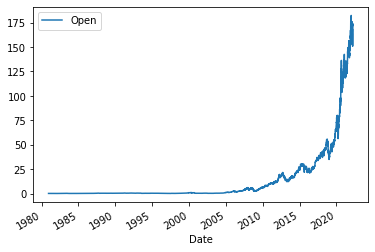

In [10]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends
Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

In [11]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
2021-11-05    0.220000
2022-02-04    0.220000
Name: Dividends, Length: 74, dtype: float64

We can plot the dividends overtime:



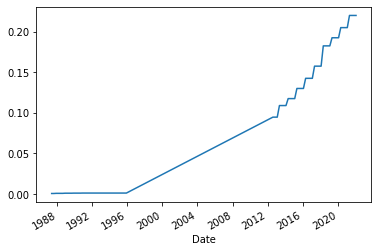

In [12]:
apple.dividends.plot()